In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
     os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [3]:
import pandas as pd
fetch_housing_data()
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

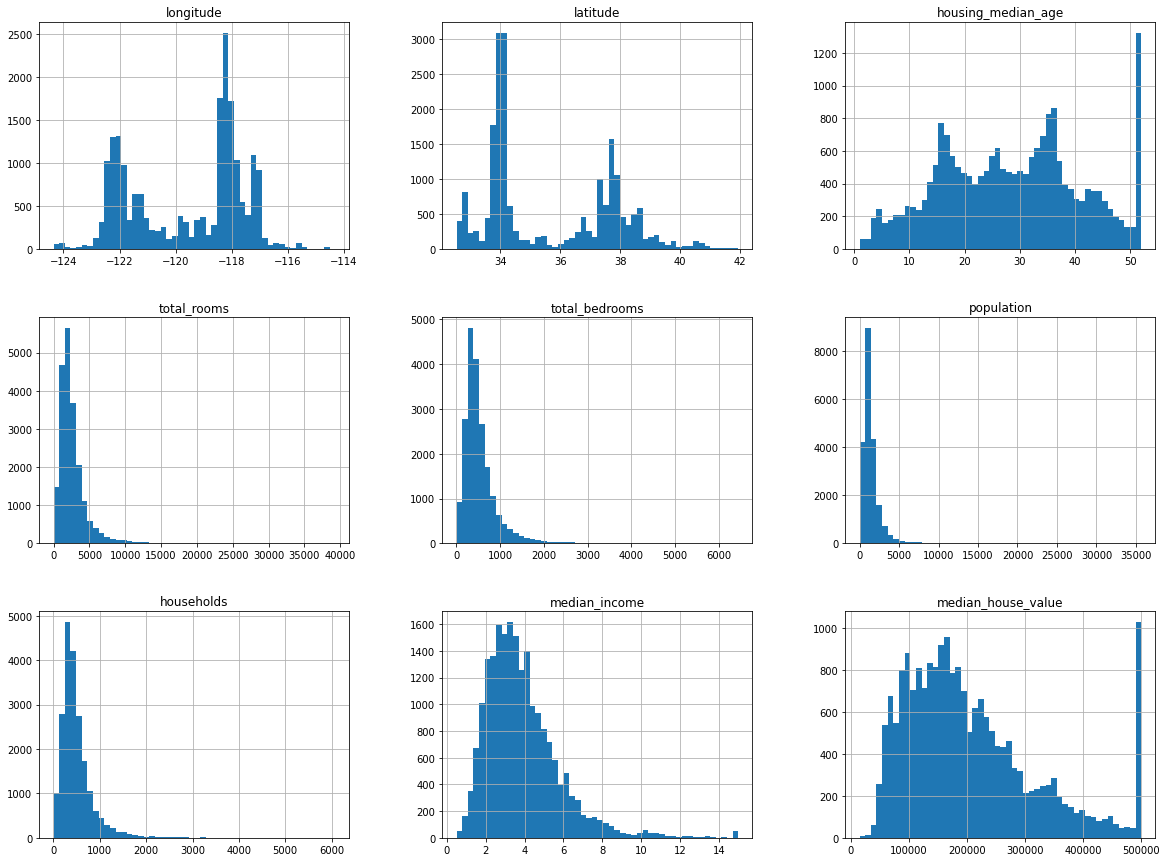

In [6]:
housing = load_housing_data()

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [9]:
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [11]:
 housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

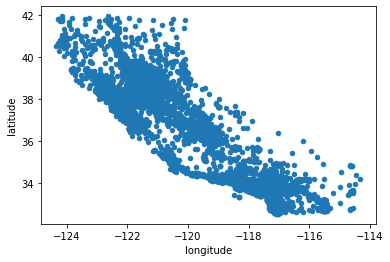

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

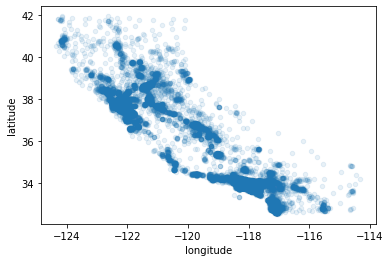

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

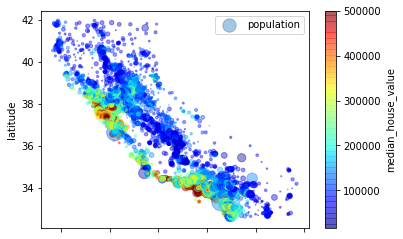

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


In [17]:
corr_matrix = housing.corr()

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64